In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv(r'C:\Users\nafii\OneDrive\Documents\Clustering\force2020_data_unsupervised_learning.csv', index_col = 'DEPTH_MD')

In [16]:
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342


In [18]:
df.dropna(inplace=True)

In [20]:
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085


In [22]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [24]:
scaler = StandardScaler()

In [26]:
df[['RHOB_T', 'NPHI_T', 'GR_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'NPHI', 'GR', 'PEF', 'DTC']])

In [28]:
df.head()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808


In [44]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\clust

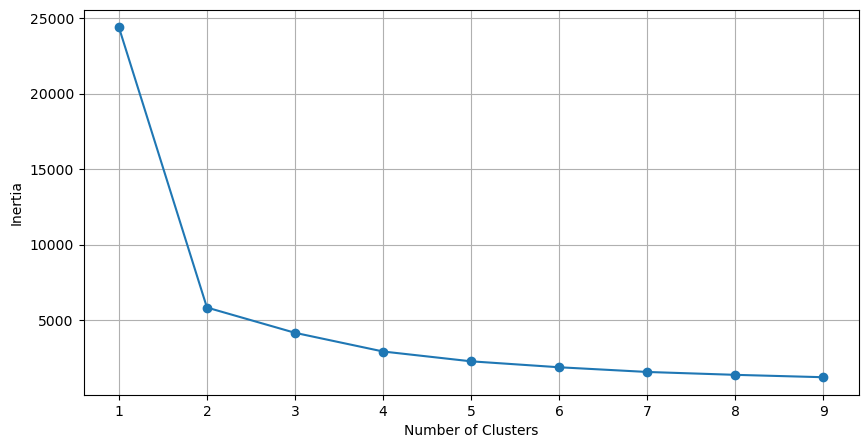

In [46]:
optimise_k_means(df[['RHOB_T', 'NPHI_T']], 10)

In [49]:
kmeans = KMeans(n_clusters=3)

In [51]:
kmeans.fit(df[['NPHI_T','RHOB_T']])

C:\Users\nafii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
df['kmeans_3'] = kmeans.labels_

In [55]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,2.523654,-0.179292,-1.255364,0.869531,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,2.770744,-0.010859,-1.247886,0.690042,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,2.524300,0.028875,-1.247450,0.554350,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,2.068584,-0.008126,-1.261572,0.585297,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,1.617342,-0.092056,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,-0.524699,0.979338,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,-0.456081,0.921870,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,-0.356250,1.032560,0.433103,-1.105910,0


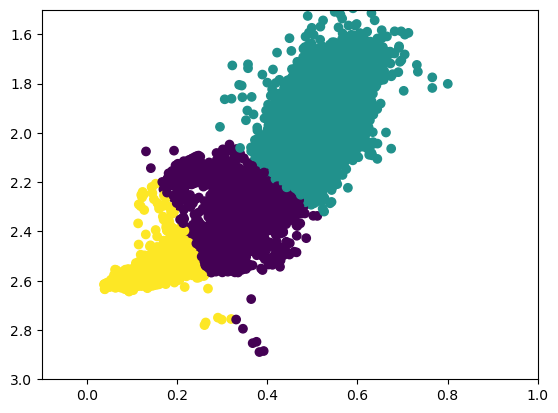

In [59]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-.1,1)
plt.ylim(3,1.5)
plt.show()